# NHANES

The National Health and Nutrition Examination Survey (NHANES) is a
cross sectional observational study run every 2-3 years by the
United States Centers for Disease Control (CDC).  It collects
extensive demographic and health-related data on a representative
sample of the US population.

In this notebook, we will use the NHANES data to illustrate
important concepts relating to association, sampling distributions,
standard errors, the law of large numbers, and the central limit
theorem.

First we import the libraries that we will be using.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

We will be simulating data in this notebook.  To make the results
reproducible, we will set the seed of the random number generator to
a fixed value.

In [2]:
np.random.seed(34324)

Modify this string according to your section number (001 or 002):

In [3]:
f = "stats206s002f21"

Now we load the NHANES data from a file.

In [4]:
base = "/scratch/%s_class_root/%s_class/shared_data/datasets" % (f, f)
df = pd.read_csv(os.path.join(base, "nhanes.csv.gz"))

Many biological processes behave differently during development
compared to in adulthood.  For this analysis, we will focus on
people of age 18 or greater (RIDAGEYR contains each subject's age in
years).

In [5]:
df = df.loc[df["RIDAGEYR"] >= 18, :]

# Correlation analyses of body size and blood pressure

The Pearson correlation coefficient describes the association betwen
two quantitative variables.  It mainly captures linear association,
but can detect certain types of non-linear association as well.  The
Pearson correlation coefficient is a numerical statistic that is
closely related to the relationship shown in a scatterplot.

The following code calculates the Pearson correlation coefficient
between height and weight.  Not surprisingly, there is a fairly
strong positive association between these variables -- people who
are taller tend to be heavier than people who are shorter.

In [6]:
df.loc[:, ["BMXHT", "BMXWT"]].corr()

,BMXHT,BMXWT
BMXHT,1.000000,0.431386
BMXWT,0.431386,1.000000


Note that the Pearson correlation coefficient is symmetric, in the
sense the cor(x, y) = cor(y, x).

In [7]:
df.loc[:, ["BMXWT", "BMXHT"]].corr()

,BMXWT,BMXHT
BMXWT,1.000000,0.431386
BMXHT,0.431386,1.000000


The corresponding scatterplot is shown below.  Setting the "alpha"
value to a smaller number (the default is 1) creates some
transparency behind each point, which reduces the effect of
overplotting.

<AxesSubplot:xlabel='BMXWT', ylabel='BMXHT'>

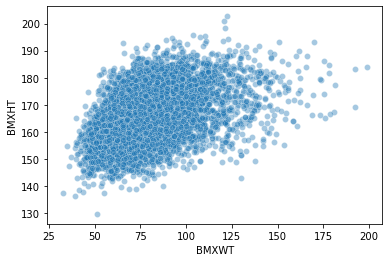

In [8]:
sns.scatterplot(x="BMXWT", y="BMXHT", alpha=0.4, data=df)

Throughout this course, we have seen that stratifying a dataset into
more homogeneous subsets can reveal more informative and meaningful
insights about the data.  Below we stratify on sex, and re-calculate
the correlation coefficient between height and weight within female
and within male subjects.

In [9]:
females = df.loc[df["RIAGENDR"] == 2, :]
males = df.loc[df["RIAGENDR"] == 1, :]

In [10]:
print(females[["BMXHT", "BMXWT"]].corr())
print(males[["BMXHT", "BMXWT"]].corr())

          BMXHT     BMXWT
BMXHT  1.000000  0.335121
BMXWT  0.335121  1.000000
          BMXHT     BMXWT
BMXHT  1.000000  0.431663
BMXWT  0.431663  1.000000


Here is a scatterplot that helps us to visualize these
relationships.  Note that female heights are somewhat less variable
than male heights, and the strength of the relationship between
height and weight is weaker in females than in males.

<AxesSubplot:xlabel='BMXHT', ylabel='BMXWT'>

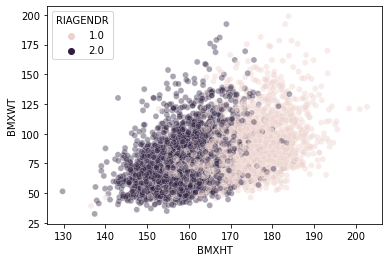

In [11]:
sns.scatterplot(x="BMXHT", y="BMXWT", hue="RIAGENDR", alpha=0.4, data=df)

Recall that the Pearson correlation between two variables is the
same if we convert the variables to Z-scores:

In [12]:
df["BMXHT_Z"] = (df["BMXHT"] - df["BMXHT"].mean()) / df["BMXHT"].std()
df["BMXWT_Z"] = (df["BMXWT"] - df["BMXWT"].mean()) / df["BMXWT"].std()

<AxesSubplot:xlabel='BMXHT_Z', ylabel='BMXWT_Z'>

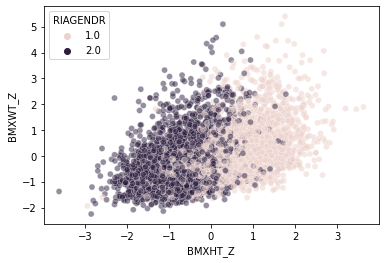

In [13]:
sns.scatterplot(x="BMXHT_Z", y="BMXWT_Z", hue="RIAGENDR", alpha=0.5, data=df)

In [14]:
print(df[["BMXHT", "BMXWT"]].corr())
print(df[["BMXHT_Z", "BMXWT_Z"]].corr())

          BMXHT     BMXWT
BMXHT  1.000000  0.431386
BMXWT  0.431386  1.000000
          BMXHT_Z   BMXWT_Z
BMXHT_Z  1.000000  0.431386
BMXWT_Z  0.431386  1.000000


Further, after converting to Z-scores, the correlation is the
"product moment" (don't worry about minor discrepancy between the
correlations calculated above and below).

In [15]:
np.mean(df["BMXHT_Z"] * df["BMXWT_Z"])

0.4312033415913895

The product of two numbers is positive if and only if the two
numbers have the same sign.  This means that when plotted in a
scatterplot, the point falls into either quadrant 1 or 3.

When two variables have a positive correlation, there will tend to
be more points in quadrants 1 and 3 (after centering the variables).
This is indicated in the following plot.

<AxesSubplot:xlabel='BMXHT', ylabel='BMXWT'>

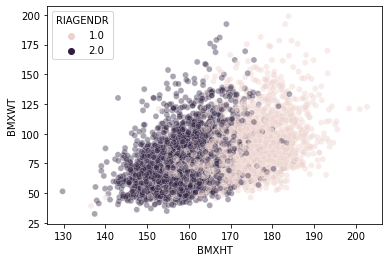

In [16]:
sns.scatterplot(x="BMXHT", y="BMXWT", hue="RIAGENDR", alpha=0.4, data=df)

Conversely, if two variables have a negative correlation, there will
tend to be more points in quadrants 2 and 4.  Since height and
weight are positively correlated, the majority of points are in
quadrants 1 or 3 for these data.

In [17]:
np.mean(df["BMXHT_Z"] * df["BMXWT_Z"] > 0)

0.6397558849171753

The correlations calculated above were mostly in the 0.3-0.4 range.
These are substantial correlations, but fall far short of the upper
limit of the correlation coefficient which is 1.  We have two
variables in the dataset with correlation approaching this level,
specifically, repeated measures of blood pressure on the same
person.  These repeated blood pressure measures are named "BPXSY1",
"BPXSY2", and "BPXSY3".  Blood pressure measures are "volatile", in
that if you measure a person's blood pressure on two occasions, say
30 minutes apart, there will be some difference between the two
measures (which would be much less so with a more stable variable
such as height or weight).  Two repeated measurements of the same
variable (e.g. blood pressure) will almost always be more correlated
than two measures of distinct variables (e.g. weight and height).
Below is the correlation coefficient between the first two repeated
blood pressure measures.

In [18]:
df[["BPXSY1", "BPXSY2"]].corr()

,BPXSY1,BPXSY2
BPXSY1,1.000000,0.962287
BPXSY2,0.962287,1.000000


Another way to get a sense for the similarity between two repeated
measures of blood pressure is to take the median value (over the
people) of the absolute value of the difference between the two
blood pressure measures.

In [19]:
x = (df["BPXSY1"] - df["BPXSY2"]).dropna()
np.median(np.abs(x))

2.0

We see that the two repeated measures of blood pressure are around 2
units (mm Hg) apart.  In contrast, the difference in blood pressure
between (as opposed to within) people is much larger:

In [20]:
bp1 = df["BPXSY1"].dropna()
np.median(np.abs(bp1 - np.median(bp1)))

10.0

Yet another way to see this relationship is through a scatterplot.

<AxesSubplot:xlabel='BPXSY1', ylabel='BPXSY2'>

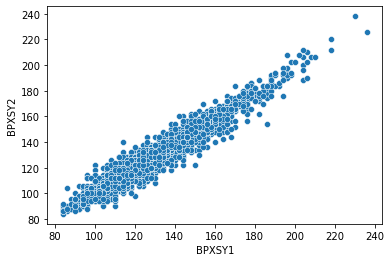

In [21]:
sns.scatterplot(x="BPXSY1", y="BPXSY2", data=df)

## Associations between nominal variables

Associations between nominal variables can be quantified using
methods from basic probability that we have already developed.  The
basic idea is to try to force the data to match an independent
distribution.  If the data do not match any independent distribution
very well, then we will judge them to be strongly associated, or
dependent.

To begin, we construct a stratified age variable, which will have a
nominal type, by constructing five age bins with roughly equal
sample sizes.  The pandas method `qcut` stands for _quantile cut_,
and is used to create a sequence of categories from a quantitative
variable based on its quantiles.

In [22]:
df["Age_strat"] = pd.qcut(df["RIDAGEYR"], 5)

Next we form three strata of blood pressure.

In [23]:
df["BP_strat"] = pd.qcut(df["BPXSY1"], 3)

The following table shows the number of people in each cell of the
"contingency table" for age and blood pressure.

In [24]:
ct = df.groupby(["Age_strat", "BP_strat"]).size().unstack()
ct

BP_strat,"(81.999, 116.0]","(116.0, 130.0]","(130.0, 236.0]"
Age_strat,,,
"(17.999, 29.0]",695,351,77
"(29.0, 41.0]",555,336,154
"(41.0, 54.0]",391,388,351
"(54.0, 66.0]",224,344,469
"(66.0, 80.0]",158,287,621


We can obtain a joint distribution (containing proportions or
estimated probabilities) by dividing this table by the total number
of observations.

In [25]:
probs = ct / ct.sum().sum()
probs

BP_strat,"(81.999, 116.0]","(116.0, 130.0]","(130.0, 236.0]"
Age_strat,,,
"(17.999, 29.0]",0.128680,0.064988,0.014257
"(29.0, 41.0]",0.102759,0.062211,0.028513
"(41.0, 54.0]",0.072394,0.071839,0.064988
"(54.0, 66.0]",0.041474,0.063692,0.086836
"(66.0, 80.0]",0.029254,0.053138,0.114979


We already know how to obtain the marginal distributions for age and
blood pressure:

In [26]:
age_marg = probs.sum(1)
bp_marg = probs.sum(0)

We have also already seen how to construct an exactly independent
joint distribution between age and blood pressure (see the course
notes on probability to review this if needed).

In [27]:
ind = np.outer(age_marg, bp_marg)
ind

array([[0.07788024, 0.06567656, 0.06436765],
       [0.07247093, 0.06111488, 0.05989688],
       [0.07836569, 0.06608595, 0.06476888],
       [0.07191613, 0.06064701, 0.05943834],
       [0.07392728, 0.06234303, 0.06110055]])

The next step is to construct a table of counts that matches the
observed sample size, and has proportions that are exactly
independent.

In [28]:
cnt = ind * ct.sum().sum()
cnt

array([[420.63117941, 354.71912609, 347.6496945 ],
       [391.41547862, 330.0814664 , 323.50305499],
       [423.25310128, 356.93019811, 349.81670061],
       [388.41899648, 327.55452694, 321.02647658],
       [399.28124421, 336.71468247, 330.00407332]])

The next cell calculates residuals between the observed counts
within each age/BP cell, and the count that would be obtained if age
and BP were exactly independent.

In [29]:
res = ct - cnt
res

BP_strat,"(81.999, 116.0]","(116.0, 130.0]","(130.0, 236.0]"
Age_strat,,,
"(17.999, 29.0]",274.368821,-3.719126,-270.649695
"(29.0, 41.0]",163.584521,5.918534,-169.503055
"(41.0, 54.0]",-32.253101,31.069802,1.183299
"(54.0, 66.0]",-164.418996,16.445473,147.973523
"(66.0, 80.0]",-241.281244,-49.714682,290.995927


The table above already gives us some insight into the dependence
between age and blood pressure, but a more informative way to view
these results is by scaling each cell by the square root of the
expected count.  We won't be able to fully justify this now, but the
basic idea is to put the residuals on a common scale. These values
are sometimes called the "Pearson residuals".

In [30]:
pres = res / np.sqrt(cnt)
pres

BP_strat,"(81.999, 116.0]","(116.0, 130.0]","(130.0, 236.0]"
Age_strat,,,
"(17.999, 29.0]",13.377779,-0.197469,-14.515654
"(29.0, 41.0]",8.268433,0.325764,-9.424066
"(41.0, 54.0]",-1.567730,1.644549,0.063267
"(54.0, 66.0]",-8.342607,0.908667,8.258736
"(66.0, 80.0]",-12.074916,-2.709278,16.018700


When a Pearson residual is positive, this means that the
corresponding cell has a greater count than would be expected if the
variables being studied (here age and blood pressure) were
independent. When a Pearson residual is negative, the corresponding
cell has a smaller count than would be expected under independence.
There is no universal standard for judging the magnitudes of Pearson
residuals, but values under 1 are negligible and values greater than
3 are large.

## Law of large numbers

Now we will use simulation to illustrate the law of large numbers
(LLN).  The LLN argues that if we take the sample mean of $n$ iid
values, say $\bar{x}^{(n)} = (x_1 + \cdots + x_n)/n$, and then let
$n$ grow, as if you were obtaining larger and larger data sets, then
$\bar{x}^{(n)}$ will converge to the expected value $E[x]$ of the
data that you are sampling.

To illustrate the LLN we select a more homogeneous group of subjects
so that the mean is informative.

In [31]:
v = df.loc[(df["RIDAGEYR"] <= 30) & (df["RIAGENDR"] == 2), "BPXSY1"]

In this case we will need a numpy array not a Pandas Series, so we
do the conversion here:

In [32]:
v = np.asarray(v.dropna())

The following code "cumulatively averages" the data.  This is an
operation that takes a sequence of numbers x1, x2, ..., and
constructs a new sequence by averaging the first value, the first
two values, the first three values, and so on.  For example, if our
data were [2, 4, 6, 10], then the cumulative averages are [2, 3, 4,
5.5] -- each cumulative average is the regular average of an initial
sequence of the data values.

These are the deminators (sample size) for each term in the
cumulative average.

In [33]:
n = np.arange(1, len(v)+1)

Plotting one cumulative average shows us what we might have obtained
had we recalculated the sample mean each time we obtained data for
one additional person.  We don't know what the population mean is
for these data, but the sample mean is converging to a value of
around 111 for the finite set of data that we have.  According to
the LLN, if we continued this process with greater values of n, we
would converge in the limit to the population mean blood pressure
(for the subpopulation of subjects considered here).

Text(0, 0.5, 'Average value')

<Figure size 432x288 with 0 Axes>

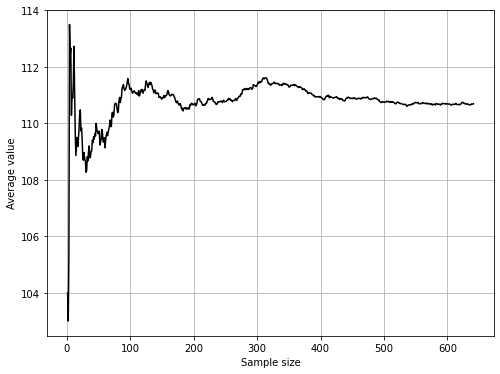

In [34]:
y = np.cumsum(v) / n
plt.clf()
plt.figure(figsize=(8, 6))
plt.grid(True)
plt.plot(n, y, '-', color='black')
plt.xlabel("Sample size")
plt.ylabel("Average value")

The order of values in our dataset are arbitrary.  To see what we
might have obtained had we sampled the people in our study in a
different order, we can repeat this process, randomly permuting the
values each time.  Then we plot each of these random sets of
cumulative averages.

Below may be the first time we have encountered a 'for' loop in this
course.  All of the indented code inside the for loop is executed
repeatedly, in this case 5 times, and the "index variable" j tells
us which is the current iteration through the loop.  This is only a
brief introduction to the concept of a 'for' loop but is sufficient
for this task.

Text(0, 0.5, 'Average value')

<Figure size 432x288 with 0 Axes>

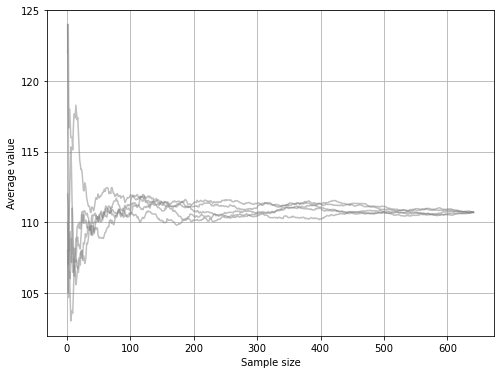

In [35]:
plt.clf()
plt.figure(figsize=(8, 6))
plt.grid(True)
for j in range(5):
    np.random.shuffle(v)
    y = np.cumsum(v) / n
    plt.plot(n, y, '-', color='grey', alpha=0.5)
plt.xlabel("Sample size")
plt.ylabel("Average value")

In the above plot, you can see that all of the sequences of
cumulative averages seem to be converging to the same limit (we
cannot actually see the limit since we are working with finite
samples).  Some "unlucky" trajectories are quite far off even when
the sample size is 100, but even these unlucky trajectories
eventually become similar to the others.

# Blood pressure means within sex by age strata

Now we turn to a different topic, which is the standard error of the
mean (SEM) and especially its relationship to the sample size and
variation of the data.  There is no built-in function for
calculating the standard error of the mean (SEM), so we provide that
here:

In [36]:
def sem(x):
    return x.std() / np.sqrt(len(x))

Below we create a table showing the mean, standard error, sample
size, and standard error of the mean (SEM) for 10 age x sex strata.
In NHANES, females are coded as 2 and males are coded as 1.

In [37]:
r = df.groupby(["RIAGENDR", "Age_strat"])["BPXSY1"].aggregate([np.mean, np.std, np.size, sem])
r

mean        std   size       sem
RIAGENDR Age_strat                                             
1.0      (17.999, 29.0]  118.129870  10.664442  571.0  0.446293
         (29.0, 41.0]    121.771760  13.077665  541.0  0.562253
         (41.0, 54.0]    127.453125  17.284025  542.0  0.742412
         (54.0, 66.0]    132.026565  19.001882  556.0  0.805859
         (66.0, 80.0]    135.745247  20.156051  549.0  0.860239
2.0      (17.999, 29.0]  110.698630  10.356506  621.0  0.415592
         (29.0, 41.0]    114.094697  12.461041  575.0  0.519661
         (41.0, 54.0]    122.990291  15.882160  662.0  0.617278
         (54.0, 66.0]    131.227451  19.076705  545.0  0.817156
         (66.0, 80.0]    138.692593  20.540786  573.0  0.858104

The table above shows, as expected, that older people tend to have
higher blood pressure than younger people.  Also, except for the
oldest age band, males of a given age tend to have higher blood
pressure than females of the same age.  In the highest age band, the
relationship between sex and blood pressure is reversed.  This could
be due to "survivorship bias", which is a form of selection bias.
Many of the males with very high blood pressure have died by this
point, leaving behind only the relatively healthier males.

The table also reveals substantial heteroscedasticity -- the
standard deviations are larger in the strata for older people, which
also happen to have greater means.  Thus, these data exhibit a
_location/dispersion relationship_.  When the location (mean) is
greater, then the dispersion (standard deviation) is also greater.
Since the standard error of the mean depends on the standard
deviation, the SEM is larger for the strata containing older people.
Thus, we are estimating the population mean less precisely in the
older age bands.

# Simulation study for the standard error of the mean

Next we will perform a simulation study to illustrate how the
standard error of the mean behaves as we vary the sample size, and
the level of dispersion in the data.  The simulation study will
focus on the strata for the youngest and oldest bands of women in
the population.  Below we extract the data for these subjects.

In [38]:
v1 = df.loc[(df["RIDAGEYR"] <=30) & (df["RIAGENDR"] == 2), "BPXSY1"]
v2 = df.loc[(df["RIDAGEYR"] >= 50) & (df["RIAGENDR"] == 2), "BPXSY1"]

As above, we will need numpy arrays not Pandas Series.

In [39]:
v1 = np.asarray(v1.dropna())
v2 = np.asarray(v2.dropna())

Since we are focusing on dispersion here, we will remove the means
to make it easier to make comparisons.

In [40]:
v1 = v1 - v1.mean()
v2 = v2 - v2.mean()

The data from older women (right side below) are more dispersed than
the data for younger women (left side below).

<AxesSubplot:>

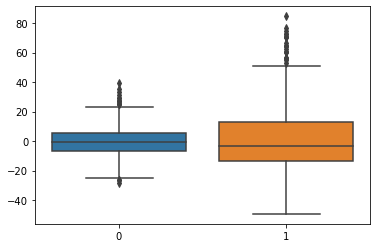

In [41]:
sns.boxplot(data=[v1, v2])

The following code generates sample means by randomly drawing
subsets from the two NHANES strata selected above.  For each
stratum, we sample 100 independent subsets of sizes ranging from 10
to 160, then take the sample mean of each subset that we obtain.

In [42]:
ns = [10, 20, 40, 80, 160] # Sample sizes to generate
x, nl = [], []
for v in v1, v2:
    for n in ns:
        # Generate 100 datasets by sampling n values from either
        # v1 or v2, then take the mean of each sampled dataset.
        y = [np.mean(np.random.choice(v, n)) for _ in range(100)]
        x.append(y) # sample means
        nl.append(n) # sample size

The plot below illustrates how the sample means taken from samples
of different sizes, and from different populations, differ in terms
of their level of dispersion.  There is evidently less dispersion as
the sample size grows, reflecting the presence of the factor of
$1/\sqrt{n}$ in the standard error of the mean.  Also, the sample
means for the older stratum (right half of the plot), which is a
parent population with greater dispersion, are themselves more
dispersed.  This reflects that presence of the factor of $\sigma$ in
the standard error of the mean.

Text(0, 0.5, 'Sample means')

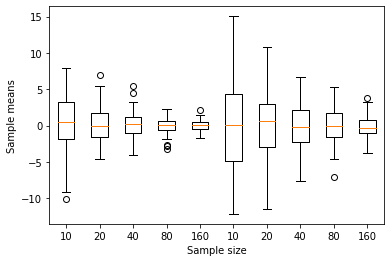

In [43]:
plt.clf()
plt.boxplot(x)
plt.xticks(range(1, 11), nl)
plt.xlabel("Sample size")
plt.ylabel("Sample means")

# Simulation study for the sampling distribution of the mean

Next we will perform a simulation study to illustrate the sampling
distribution of the mean.  The simulation study will focus on the
stratum for the the first row of the table above (the youngest band
of men).  First we extract the values from this row into separate
variables:

In [44]:
m, s, n, sem = tuple(r.iloc[0, :])
n = int(n)

Next we generate 1000 data sets, each with the same mean, standard
deviation and sample size as the selected stratum of people from the
actual NHANES data.  The data here are simulated using a normal
distribution, but below we will consider other distributions.

In [45]:
x = [m + np.random.normal(size=n)*s for _ in range(1000)]

Next we calculate the sample mean from each simulated data set:

In [46]:
y1 = [u.mean() for u in x]

The following histogram shows how the simulated sample means are
distributed.  The sample mean value that was actually obtained in
the NHANES study could be any one value drawn from this
distribution.

Text(0.5, 0, 'Sample mean')

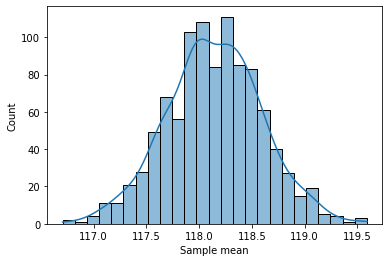

In [47]:
sns.histplot(y1, kde=True)
plt.xlabel("Sample mean")

The above plot illustrates the central limit theorem (CLT).  To
obtain the plotted data, we calculated sample means of independent
and identically distributed (iid) samples of size 571 (since this is
the size of the first stratum shown in the table above).  The CLT
argues that the distribution of sample means has a distribution that
does not depend on the distribution of the individual data values.
Moreover, this distribution is approximately normal.

Recall that a quantile-quantile (QQ) plot aids in determining
whether two samples of data follow distributions that are related by
a linear transformation.  Thus, we can sample 1000 iid standard
normal values, then construct QQ plots comparing these values to
each of the three sets of sample means constructed above.  If these
plots are approximately linear, this means that the sample means
approximately follow normal distributions.

In [48]:
z = np.random.normal(size=1000)

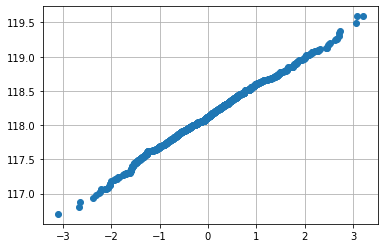

In [49]:
plt.clf()
plt.plot(np.sort(z), np.sort(y1), 'o')
plt.grid(True)

Although there are some small deviations in the tails, the plot
above shows an overwhelmingly linear pattern, supporting the
argument that the sample means derived by resampling from the
observed are approximately normally distributed.